In [12]:
import geopandas as gpd
import rioxarray
import xarray
from shapely.geometry import mapping

#### load dataset

In [18]:
ds = xarray.open_dataset('/Users/adwoa-admin/Desktop/project_Africa/emissions/PM_median_July14.nc')

In [19]:
ds

<xarray.Dataset>
Dimensions:     (lat: 121, lon: 253, time: 6)
Coordinates:
  * lat         (lat) float64 50.25 50.0 49.75 49.5 ... 21.0 20.75 20.5 20.25
  * lon         (lon) float64 -123.2 -123.0 -122.8 ... -60.75 -60.5 -60.25
  * time        (time) float64 9.969e+36 9.969e+36 ... 9.969e+36 9.969e+36
Data variables:
    pm25_anom   (lat, lon) float64 ...
    pm25_anomT  (time, lat, lon) float64 ...

### load shapefile and clip

In [20]:
Shapefile = gpd.read_file('/Users/adwoa-admin/Downloads/s_22mr22/s_22mr22.shp', crs="epsg:4326")
ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ds.rio.write_crs("epsg:4326", inplace=True)
file = Shapefile.to_crs(ds.rio.crs)

In [21]:
clipped_new = ds.rio.clip(file.geometry)

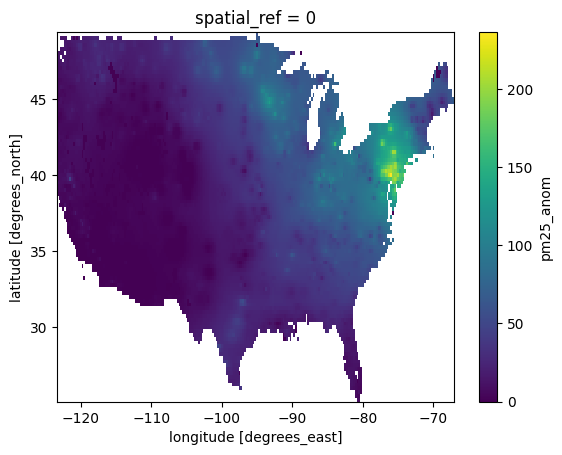

In [24]:
clipped_new.pm25_anom.plot()

#### save the netcdf

In [22]:
clipped_new.to_netcdf('/Users/adwoa-admin/Desktop/project_Africa/emissions/PM25.removemedian.july14.2023.removeCanada.nc')

In [ ]:
#files = ['mortalityhosp.removemax.july12.2023.removeCanada_Hospital.nc', 'mortalityhosp.removemax.july12.2023.removeCanada_Mortality.nc']

#mfdata = xarray.open_mfdataset('mortalityhosp.removemax.july12.2023.removeCanada_*.nc')

In [ ]:
mfdata.to_netcdf('Mortality_remove_Canada.July13.nc')

In [ ]:
mfdata.Hospital.plot()

In [13]:
mm = xarray.open_dataset('Mortality_remove_Canada.July13.nc')

In [17]:
mm.Mortality.sum()

<xarray.DataArray 'Mortality' ()>
array(403.0125, dtype=float32)